In [200]:
#imort libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [201]:
#load dataset using head function just seeing the first 10 records
df=pd.read_csv("/content/train_loan.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [202]:
#CHECKING THE DATA TYPES OF COLUMNS BY INFO METHOD
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [203]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [204]:
#ANY DUPLICATE RECORD PRESENT OR NOT
df.duplicated().sum()
#Out put shows no duplicate records present

np.int64(0)

In [205]:
#checking the presense of null values both catogoriacal and numeric data
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [206]:
for col in df.columns:
    if df[col].dtype == "object":  # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # numerical
        df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-3831804901.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3831804901.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [207]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


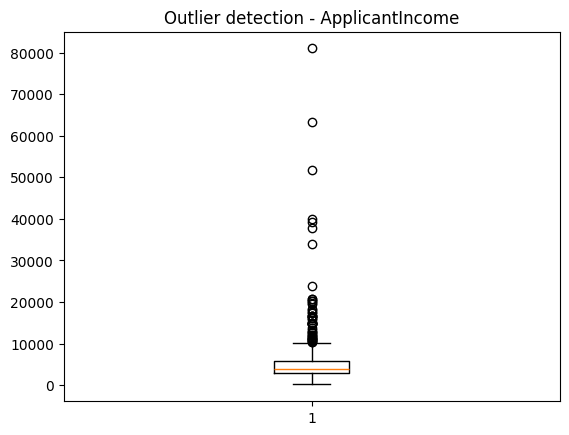

In [208]:
#outlier detection
plt.boxplot(df["ApplicantIncome"])
plt.title("Outlier detection - ApplicantIncome")
plt.show()


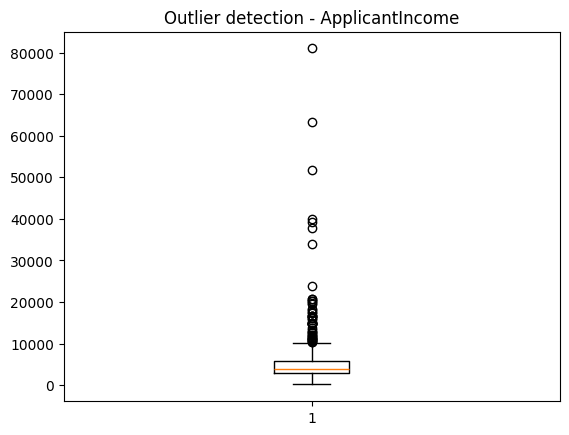

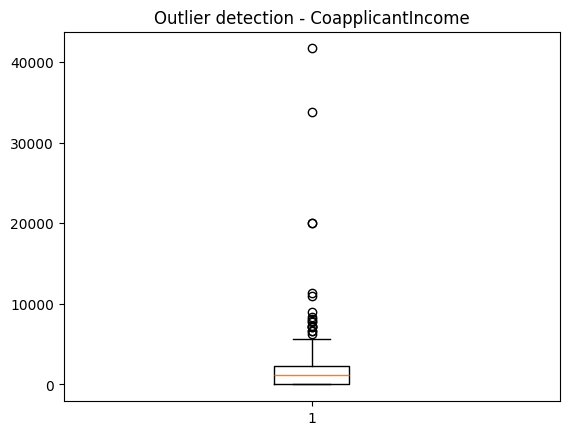

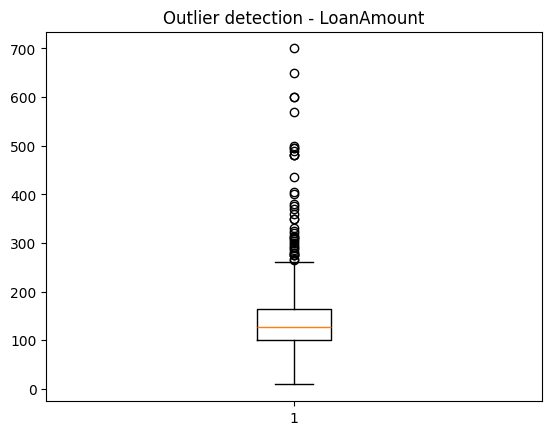

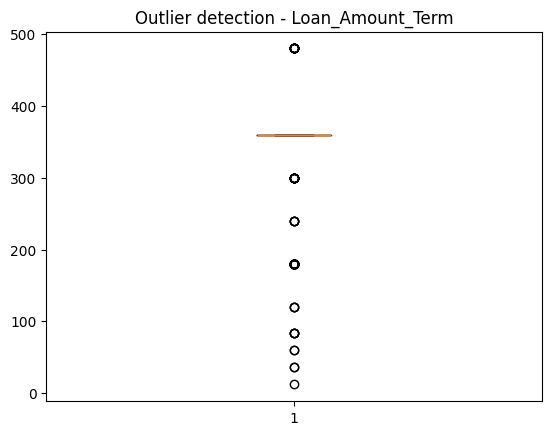

In [209]:
#outlier exits for MOST OF THE NUMERICAL COLUMNS AND IT IS RECTIFIED USING using iqr
#We use boxplots to visualize outliers.
#IQR method caps extreme values to avoid distortion

num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

for col in num_cols:
    plt.boxplot(df[col])
    plt.title(f"Outlier detection - {col}")
    plt.show()
    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))

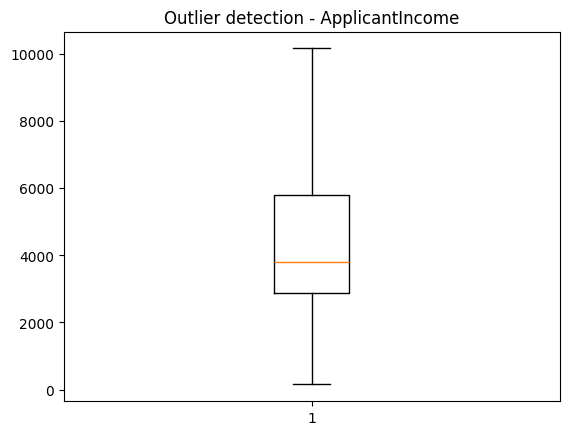

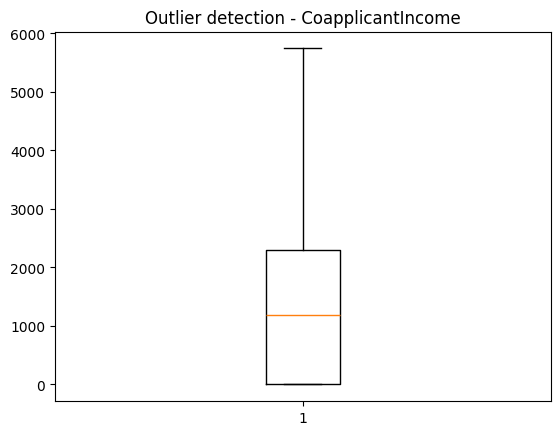

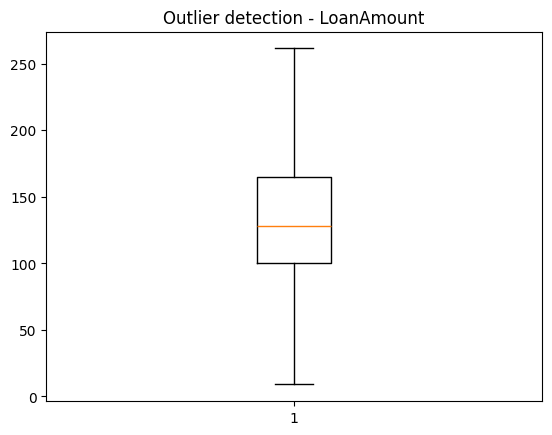

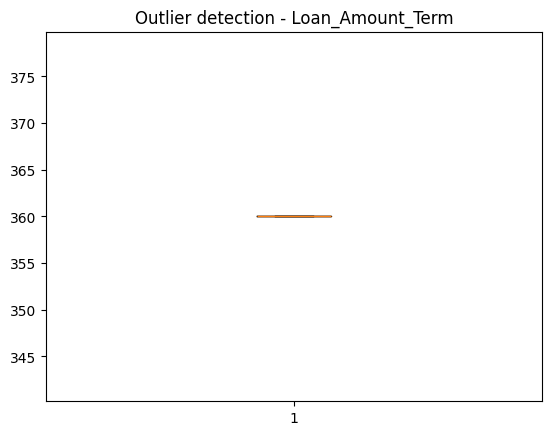

In [210]:
#DOUBLE CHECK FOR OUTLIERS
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

for col in num_cols:
    plt.boxplot(df[col])
    plt.title(f"Outlier detection - {col}")
    plt.show()

In [211]:

# Label Encoding for binary columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ["Gender", "Married", "Loan_Status"]
for col in binary_cols:
    df[col] = le.fit_transform(df[col])



In [212]:
#one hot encoding for multi catgorical values
df = pd.get_dummies(df, drop_first=True)

In [213]:
df.describe()

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000
mean,0.817590,0.653094,4617.111564,1419.702231,137.365635,360.0,0.855049,0.687296
std,0.386497,0.476373,2479.851729,1624.605892,55.779749,0.0,0.352339,0.463973
min,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,0.000000,0.000000
25%,1.000000,0.000000,2877.500000,0.000000,100.250000,360.0,1.000000,0.000000
50%,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.0,1.000000,1.000000
75%,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.0,1.000000,1.000000
max,1.000000,1.000000,10171.250000,5743.125000,261.500000,360.0,1.000000,1.000000


In [214]:
df

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001003,Loan_ID_LP001005,...,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,5849.0,0.0,128.0,360.0,1.0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,4583.0,1508.0,128.0,360.0,1.0,0,True,False,...,False,False,False,True,False,False,False,False,False,False
2,1,1,3000.0,0.0,66.0,360.0,1.0,1,False,True,...,False,False,False,False,False,False,False,True,False,True
3,1,1,2583.0,2358.0,120.0,360.0,1.0,1,False,False,...,False,False,False,False,False,False,True,False,False,True
4,1,0,6000.0,0.0,141.0,360.0,1.0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,2900.0,0.0,71.0,360.0,1.0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
610,1,1,4106.0,0.0,40.0,360.0,1.0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
611,1,1,8072.0,240.0,253.0,360.0,1.0,1,False,False,...,True,False,False,True,False,False,False,False,False,True
612,1,1,7583.0,0.0,187.0,360.0,1.0,1,False,False,...,False,True,False,False,True,False,False,False,False,True


In [215]:
#ML algorithms perform better when features are in similar ranges.
#StandardScaler → transforms to mean=0, std=1.

In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(5)

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001003,Loan_ID_LP001005,...,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.497164,-0.874587,-0.168041,0.0,1.0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,-0.013767,0.054395,-0.168041,0.0,1.0,0,True,False,...,False,False,False,True,False,False,False,False,False,False
2,1,1,-0.652632,-0.874587,-1.280462,0.0,1.0,1,False,True,...,False,False,False,False,False,False,False,True,False,True
3,1,1,-0.820924,0.578025,-0.311579,0.0,1.0,1,False,False,...,False,False,False,False,False,False,True,False,False,True
4,1,0,0.558104,-0.874587,0.065209,0.0,1.0,1,False,False,...,False,False,False,False,False,False,False,False,False,True


In [217]:
#cleaned data saved
df.to_csv("loan_prediction_cleaned.csv", index=False)